# End to End multi class dog Breed Classification
 This notebook builds an end to end multi class image classifier using Tensorflow 2.0 and Tensor Flow hub.

 ## 1. Problem

 ## 2. Dataset
 The data we're using is from "https://www.kaggle.com/c/dog-breed-identification/data"

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

## 4. Features
Some information about the Data
* We are dealing with images (unstructured Data) so it's probably best we use deep learning/ transfer learning.
* There are 120 breeds of dogs (meaning 120 different classes) .
* There are 10k+ images in training
(these images have labels) and testing set (these images have no labels, because we will want to predict them)


In [1]:
import tensorflow as tf
print("TF version:",tf.__version__)
print("GPU","Available(yesss!!!!)" if tf.config.list_physical_devices("GPU") else "not available:")

TF version: 2.10.0
GPU Available(yesss!!!!)


In [2]:
import tensorflow_hub as hub
print("Hub version:",hub.__version__)
# Check for GPU availability
print("GPU","Available(yesss!!!!)" if tf.config.list_physical_devices("GPU") else "not available:")

Hub version: 0.16.1
GPU Available(yesss!!!!)


### Works only in in colab

In [3]:
# iMPORT tensor flow 2.0x
# try:
#   %tensorflow_version 2.x
# except:
#   pass

## Getting data into tensors

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
labels_csv=pd.read_csv("Dog_Vision/labels.csv");
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [7]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [8]:
# How much image are there for each brees
labels_csv["breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

<Axes: xlabel='breed'>

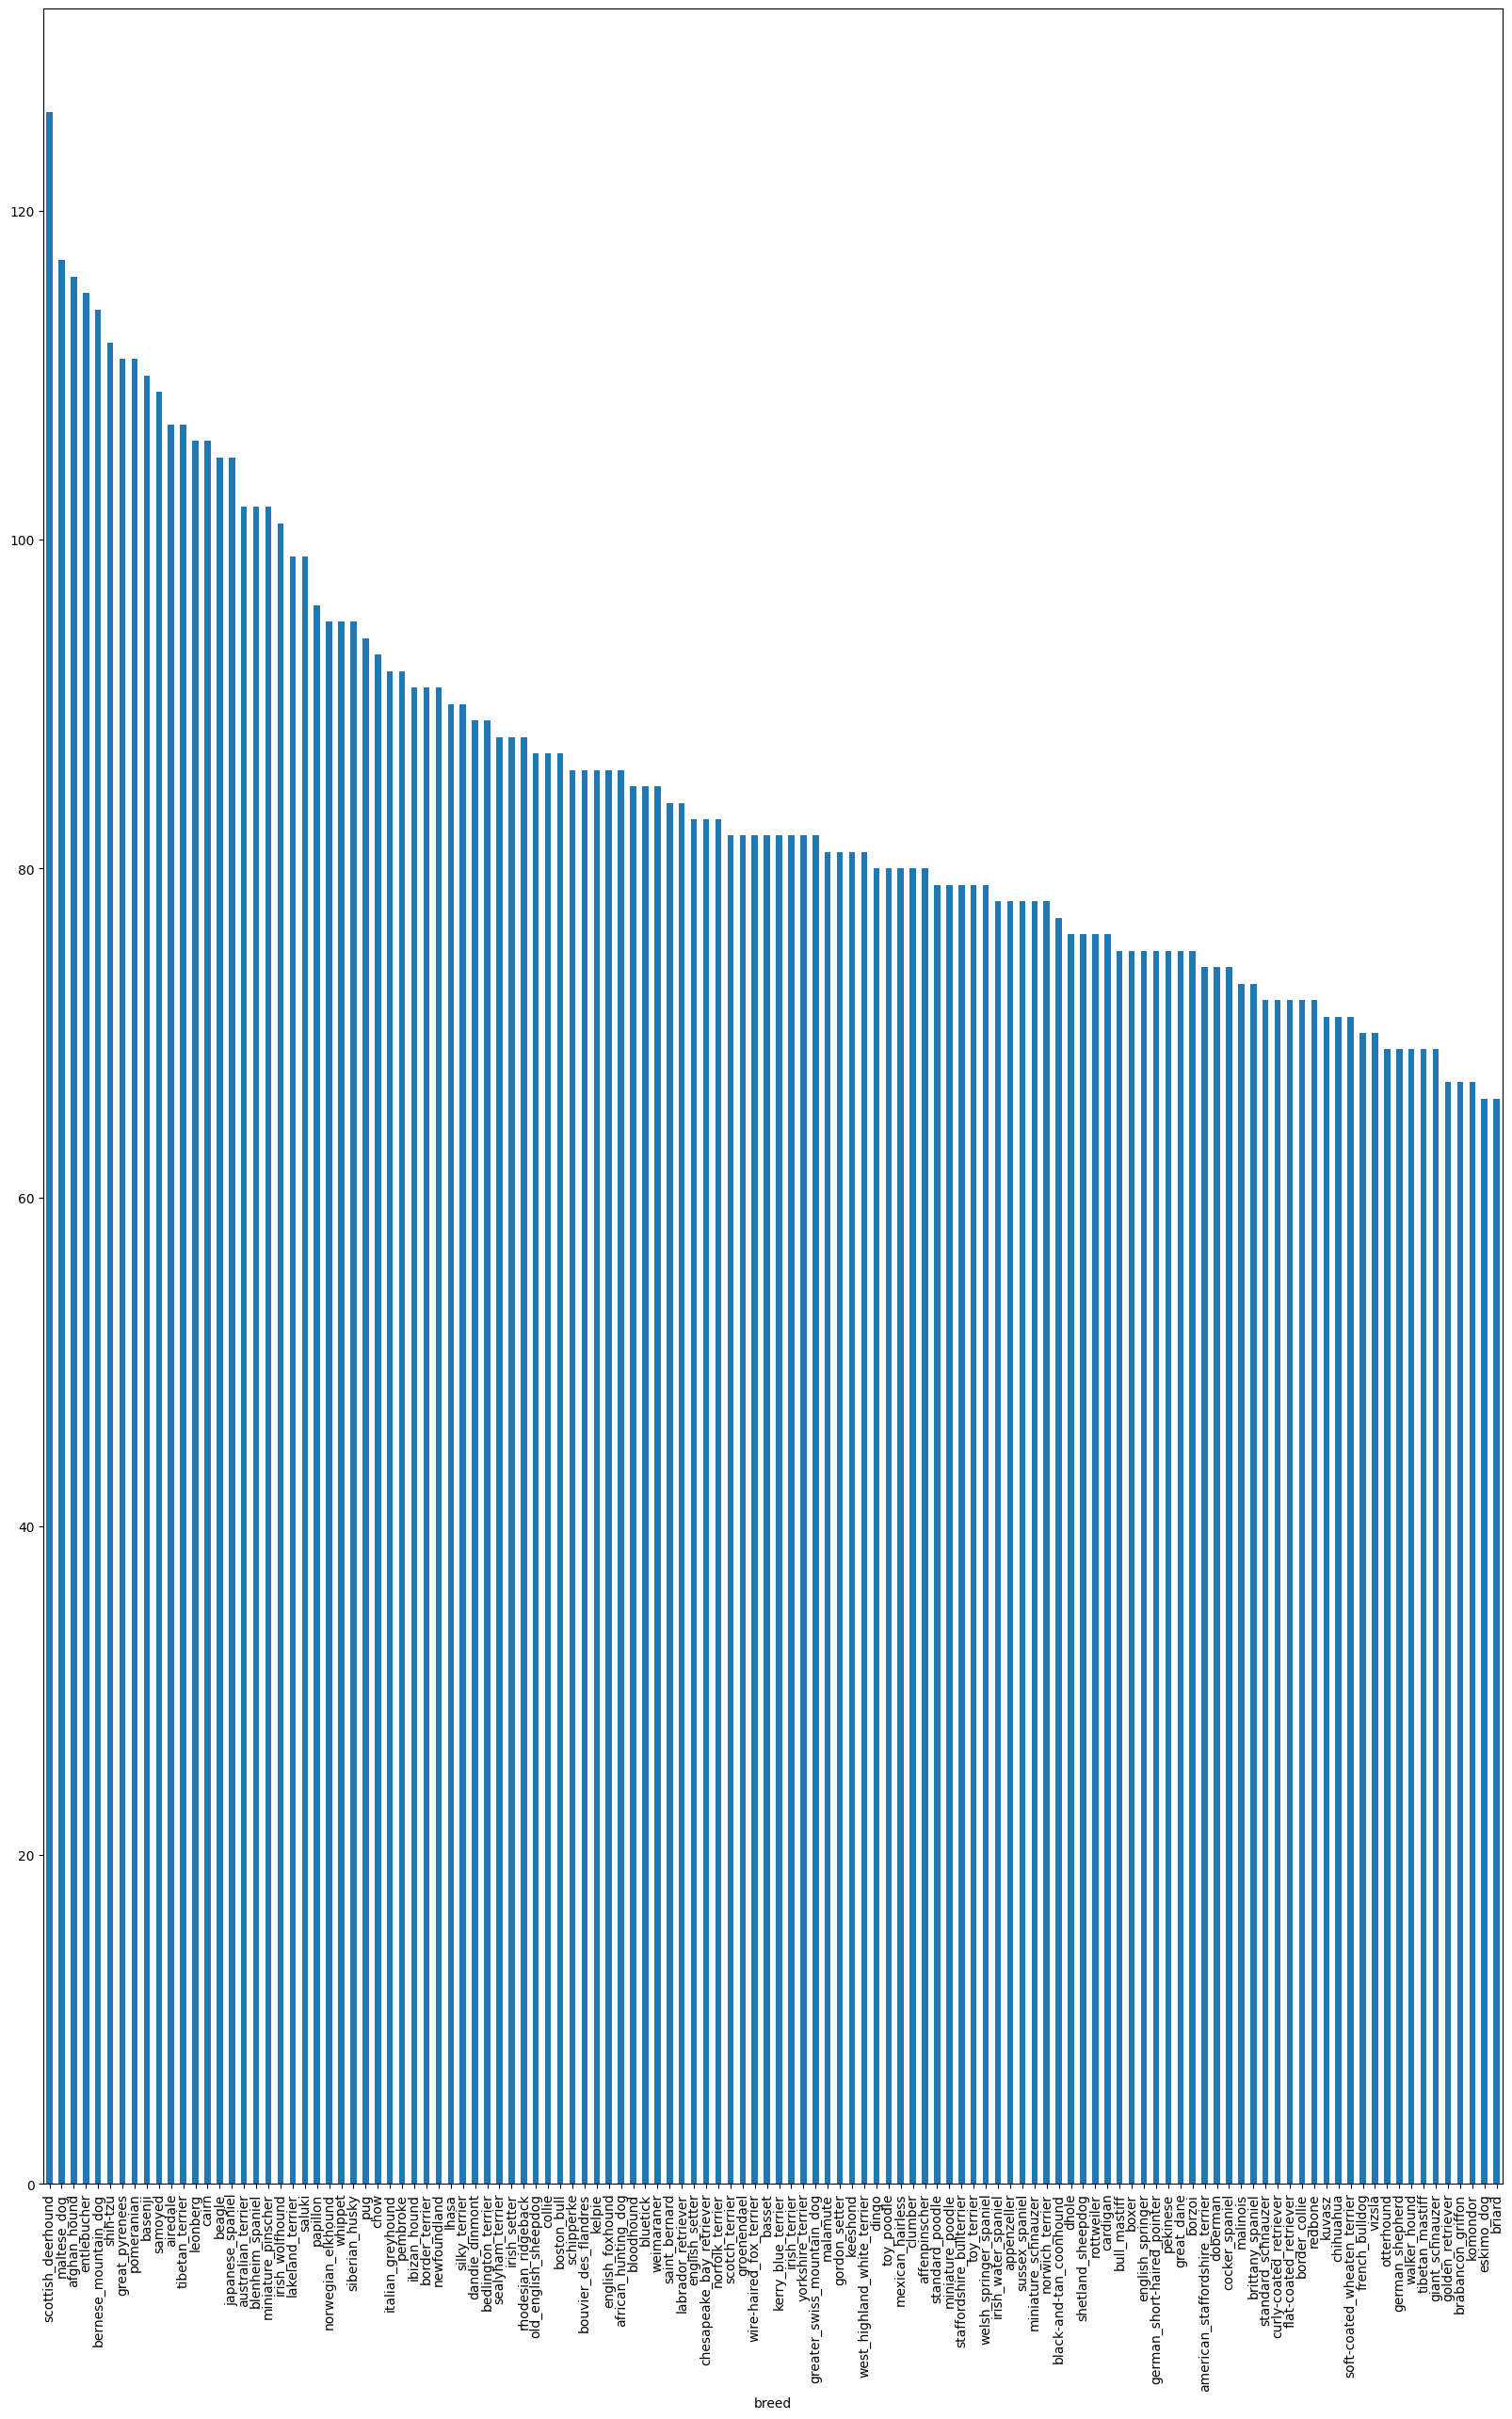

In [9]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,30))

In [10]:
# Viewing an image
from IPython.display import Image

In [11]:
import os
cwd = os.getcwd()
print(cwd)

D:\Conda_Pro_\TensorFLow


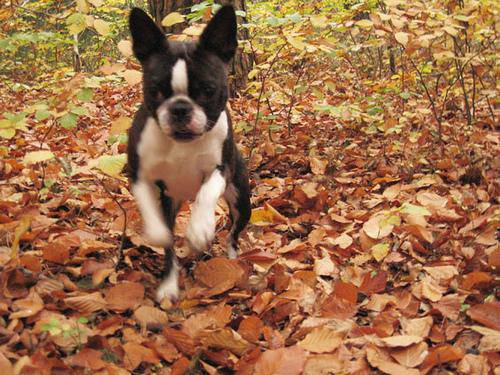

In [12]:
Image("Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

## Getting images and their labels

In [13]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [14]:
#creating pathnames from Image ID's
filenames=["Dog_Vision/train/"+fname +".jpg" for fname in labels_csv["id"]]
filenames[:5]

['Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [15]:
# Checking whether number of filename matches number of actual image files
if len(os.listdir("Dog_Vision/train/"))== len(filenames):
    print("FIlename match the actual amount of files!!! Proceed.")
else:
    print("FIlenames do not match the actual amount of files, check the target directory.")

FIlename match the actual amount of files!!! Proceed.


In [16]:
import numpy as np

In [17]:
labels=labels_csv["breed"]
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [18]:
len(labels)

10222

In [19]:
#Finding unique label values
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [20]:
#turning a single label into an array of booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
#turning every label into a boolean array
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
len(boolean_labels)

10222

In [23]:
# turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds==labels[0])) #index where label occurs
print(boolean_labels[0].argmax())#index where label occurs in boolean array
print(boolean_labels[0].astype(int))#there will be a 1 where the sample label occurs


boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [24]:
# Creating our own validation set
X=filenames
y=boolean_labels

In [25]:
# We're going to start off experimenting with ~ 1000 images
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}


In [26]:
import ipywidgets as widgets
from IPython.display import display

NUM_IMAGES = widgets.IntSlider(
    value=1000,
    min=1000,
    max=10000,
    step=1000,
    description='NUM_IMAGES:',
    continuous_update=False
)

display(NUM_IMAGES)


IntSlider(value=1000, continuous_update=False, description='NUM_IMAGES:', max=10000, min=1000, step=1000)

In [27]:
from sklearn.model_selection import train_test_split
#split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.2, random_state=42)
len(X_train),len(y_train),len(X_val),len(y_val)

(8177, 8177, 2045, 2045)

## Preprocessing images into tensors
to preprocess our images into tensors we are going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable `image`
3. Turn our `image` (a jpg) into 
4. Normalize our image (convert color channel values from 0-255 to 0-1)
5. Resize the `image` to be shape of (224,224)
6. Return the modifier `image`

In [28]:
# Convert image to Numpy
from matplotlib.pyplot import imread
image =imread(filenames[5])
image.shape

(375, 500, 3)

In [29]:
IMG_SIZE=224

# Create a function for preprocessing images
def process_image(image_path,img_size=IMG_SIZE):
    """
    Takes an image filepath and turns the image into tensor
    """
    #read in an image file
    image=tf.io.read_file(image_path)
    #turn the jpg image into numerical tensor with 3 color channels(RGB)
    image=tf.image.decode_jpeg(image,channels=3)
    #convert the color chanel values from 0-255 to 0-1 values
    image=tf.image.convert_image_dtype(image,tf.float32)
    #Resize the image to desired value (224,224)
    image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

    return image

In [30]:
tensor=tf.io.read_file(filenames[26])

In [31]:
tensor=tf.image.decode_jpeg(tensor,channels=3)
print(tensor)

tf.Tensor(
[[[ 59  68  65]
  [ 64  73  70]
  [ 71  80  77]
  ...
  [115 128 108]
  [115 128 108]
  [110 123 103]]

 [[ 65  74  71]
  [ 72  81  78]
  [ 79  88  85]
  ...
  [114 127 107]
  [117 130 110]
  [116 129 109]]

 [[ 68  77  74]
  [ 76  85  82]
  [ 83  92  89]
  ...
  [114 127 107]
  [120 133 113]
  [123 136 116]]

 ...

 [[173 200 155]
  [164 179 136]
  [181 166 133]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[142 159 117]
  [147 154 113]
  [189 174 141]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[167 179 139]
  [167 172 132]
  [204 188 155]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]], shape=(500, 375, 3), dtype=uint8)


## Turning our data into batches
 why turn our data into batches
 if we are processing Let's say you're trying to process 10,000 plus images in one go. They all might not fit into the memory. So that's why we do 32. This is the bad size images at a time. We can manually adjust the batch size if we need to. In order to tensor flow effectively, we need our data in the form of tensor tuples, which looks like `(image ,label)`.

In [32]:
# Create  a simple function to return a tuple (image,tuple)
def get_image_label(image_path,label):
    '''
    takes an image file path name and the associated label,
    processes the image and returns a tuple of (image,label).
    '''
    image=process_image(image_path)
    return image,label


In [33]:
#demo of the above
process_image(X[42],y[42]) 

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117757],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

`tf.data.Dataset.from_tensor_slices` Creates a `Dataset` whose elements are slices of the given tensors.

The given tensors are sliced along their first dimension. This operation
preserves the structure of the input tensors, removing the first dimension
of each tensor and using it as the dataset dimension. All input tensors
must have the same size in their first dimensions.

>>> # Slicing a 1D tensor produces scalar tensor elements.
>>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
>>> list(dataset.as_numpy_iterator())
[1, 2, 3]

>>> # Slicing a 2D tensor produces 1D tensor elements.
>>> dataset = tf.data.Dataset.from_tensor_slices([[1, 2], [3, 4]])
>>> list(dataset.as_numpy_iterator())
[array([1, 2], dtype=int32), array([3, 4], dtype=int32)]

>>> # Slicing a tuple of 1D tensors produces tuple elements containing
>>> # scalar tensors.
>>> dataset = tf.data.Dataset.from_tensor_slices(([1, 2], [3, 4], [5, 6]))
>>> list(dataset.as_numpy_iterator())
[(1, 3, 5), (2, 4, 6)]

>>> # Dictionary structure is also preserved.
>>> dataset = tf.data.Dataset.from_tensor_slices({"a": [1, 2], "b": [3, 4]})
>>> list(dataset.as_numpy_iterator()) == [{'a': 1, 'b': 3},
...                                       {'a': 2, 'b': 4}]
True


In [59]:
#Define the batch size , 32 is a good start
BATCH_SIZE=32
#Create a function to turn data into batches
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
    """
    Creates batches  of data out of image X and y pairs.
    Shuffles the data if its training but doesnt shuffle if its validation data.
    Also accepts test data as input (no labels)
    """
#if the data is a test datset, we probably don't have labels
    if test_data:
        print("Creating test data batches")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepaths (no labels)
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch


# If the data set is valid dataset , we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),#file paths
                                             tf.constant(y)))#Labels
        data_batch=data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        print("Creating training data batches")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),#file path
                                            tf.constant(y))) #labels

# shuffling the pathnames and labels before mapping image processor function is faster than shuffling images
        data=data.shuffle(buffer_size=len(X))

#Create (image,label) tuples (this also turns the image path into a preprocessed image)
        data=data.map(get_image_label)
        data_batch = data.batch(BATCH_SIZE)
    return data_batch


In [60]:
# create training and validation set
train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val,valid_data=True)

Creating training data batches
Creating validation data batches


In [64]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches


In [67]:
import matplotlib.pyplot as plt
def show25_images(images,labels):
    """
    Display a plot of 25 images and their labels from a data batch
    """

#setup the figure
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        #display an image
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])

In [68]:
y[0].argmax()

19

In [69]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [71]:
train_images,train_labels=next(train_data.as_numpy_iterator())#numpy_iterator unbatches the batches
train_images,train_labels

(array([[[[0.23186275, 0.18718489, 0.2252101 ],
          [0.22240898, 0.19747901, 0.24348742],
          [0.29726893, 0.297549  , 0.34852943],
          ...,
          [0.4972034 , 0.52752686, 0.63326895],
          [0.28452426, 0.27563095, 0.36939853],
          [0.23116337, 0.21155553, 0.2990206 ]],
 
         [[0.21837643, 0.17369856, 0.21172377],
          [0.21762472, 0.19269475, 0.23486069],
          [0.28235108, 0.2826312 , 0.33157733],
          ...,
          [0.48149464, 0.50963306, 0.6153751 ],
          [0.28068167, 0.2679458 , 0.36363468],
          [0.22969422, 0.21008638, 0.29755145]],
 
         [[0.20679273, 0.16211486, 0.20014007],
          [0.2192632 , 0.192691  , 0.23237765],
          [0.267638  , 0.2674834 , 0.31468228],
          ...,
          [0.45808432, 0.48478064, 0.5882848 ],
          [0.27581945, 0.25978312, 0.3571222 ],
          [0.22933395, 0.20784244, 0.2959354 ]],
 
         ...,
 
         [[0.5000064 , 0.42941818, 0.3902025 ],
          [0.46042

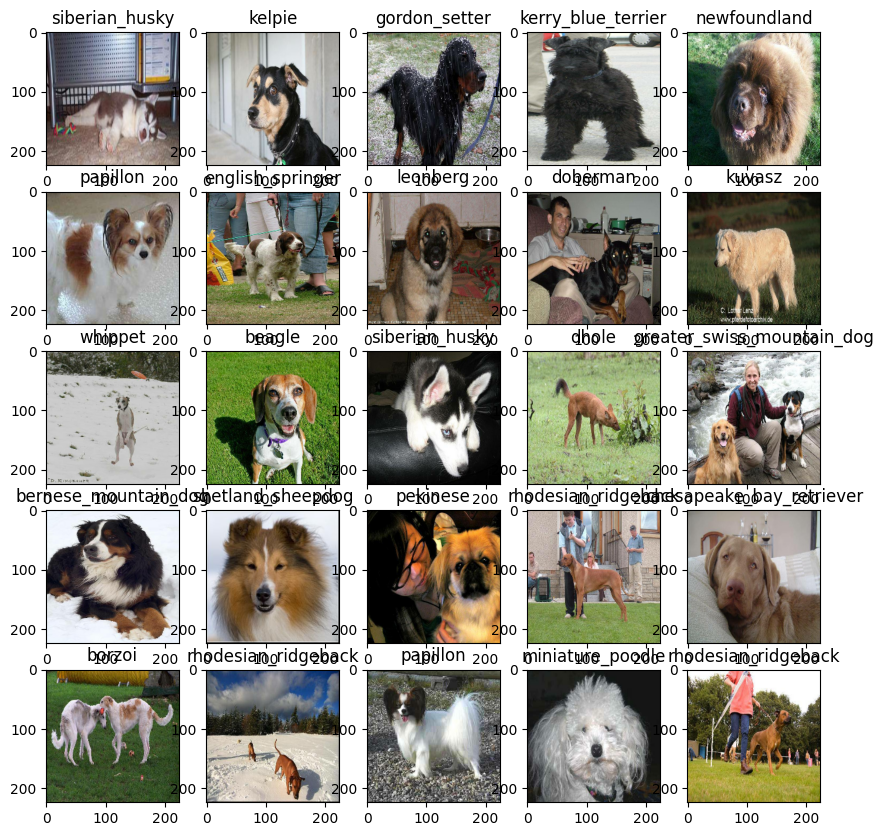

In [73]:
show25_images(train_images,train_labels)

In [74]:
val_images,val_labels=next(val_data.as_numpy_iterator())#numpy_iterator unbatches the batches
val_images,val_labels

(array([[[[0.4615459 , 0.5478204 , 0.60272235],
          [0.4615459 , 0.5478204 , 0.60272235],
          [0.45909494, 0.5453694 , 0.60027134],
          ...,
          [0.41813728, 0.5083334 , 0.56323534],
          [0.4156863 , 0.5058824 , 0.56078434],
          [0.4156863 , 0.5058824 , 0.56078434]],
 
         [[0.45522588, 0.5415004 , 0.59640235],
          [0.45522588, 0.5415004 , 0.59640235],
          [0.4527749 , 0.5390494 , 0.59395134],
          ...,
          [0.41813728, 0.5083334 , 0.56323534],
          [0.4156863 , 0.5058824 , 0.56078434],
          [0.4156863 , 0.5058824 , 0.56078434]],
 
         [[0.45098042, 0.5372549 , 0.5921569 ],
          [0.45098042, 0.5372549 , 0.5921569 ],
          [0.44852945, 0.5348039 , 0.5897059 ],
          ...,
          [0.41813728, 0.5083334 , 0.56323534],
          [0.4156863 , 0.5058824 , 0.56078434],
          [0.4156863 , 0.5058824 , 0.56078434]],
 
         ...,
 
         [[0.18869358, 0.32987005, 0.42398772],
          [0.18944

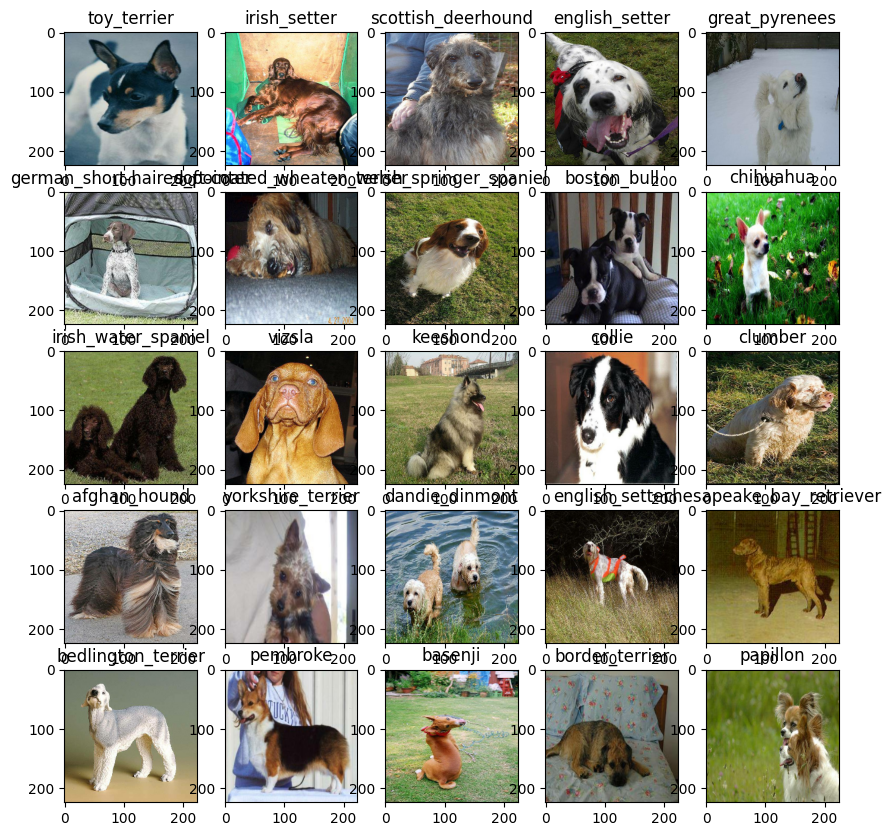

In [75]:
show25_images(val_images,val_labels)